# Import Cleaned Data & Packages

In [231]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import statsmodels.api as sm
import statsmodels.stats.api as sms
import statsmodels.formula.api as smf
import scipy.stats as stats
from statsmodels.formula.api import ols

In [232]:
#See part 1 for scrubbing process

df  = pd.read_csv('cleaned_df')
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,sqft_living15,sqft_lot15,yr_sold,home_age,yrs_since_reno,neighborhood
0,221900.0,3,1.00,1180,5650,1.0,0.0,0.0,3,7,1180,0,1340,5650,2014,65,2020,Seattle
1,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,3,7,2170,400,1690,7639,2014,69,29,Seattle
2,180000.0,2,1.00,770,10000,1.0,0.0,0.0,3,6,770,0,2720,8062,2015,87,2020,Kenmore
3,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,5,7,1050,910,1360,5000,2014,55,2020,Seattle
4,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,3,8,1680,0,1800,7503,2015,33,2020,Sammamish


# Exploring Data

In [233]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21188 entries, 0 to 21187
Data columns (total 18 columns):
price             21188 non-null float64
bedrooms          21188 non-null int64
bathrooms         21188 non-null float64
sqft_living       21188 non-null int64
sqft_lot          21188 non-null int64
floors            21188 non-null float64
waterfront        21188 non-null float64
view              21188 non-null float64
condition         21188 non-null int64
grade             21188 non-null int64
sqft_above        21188 non-null int64
sqft_basement     21188 non-null int64
sqft_living15     21188 non-null int64
sqft_lot15        21188 non-null int64
yr_sold           21188 non-null int64
home_age          21188 non-null int64
yrs_since_reno    21188 non-null int64
neighborhood      21188 non-null object
dtypes: float64(5), int64(12), object(1)
memory usage: 2.9+ MB


## Scatter Plots

In [234]:
#Check for linear relationship between target (price) and variables

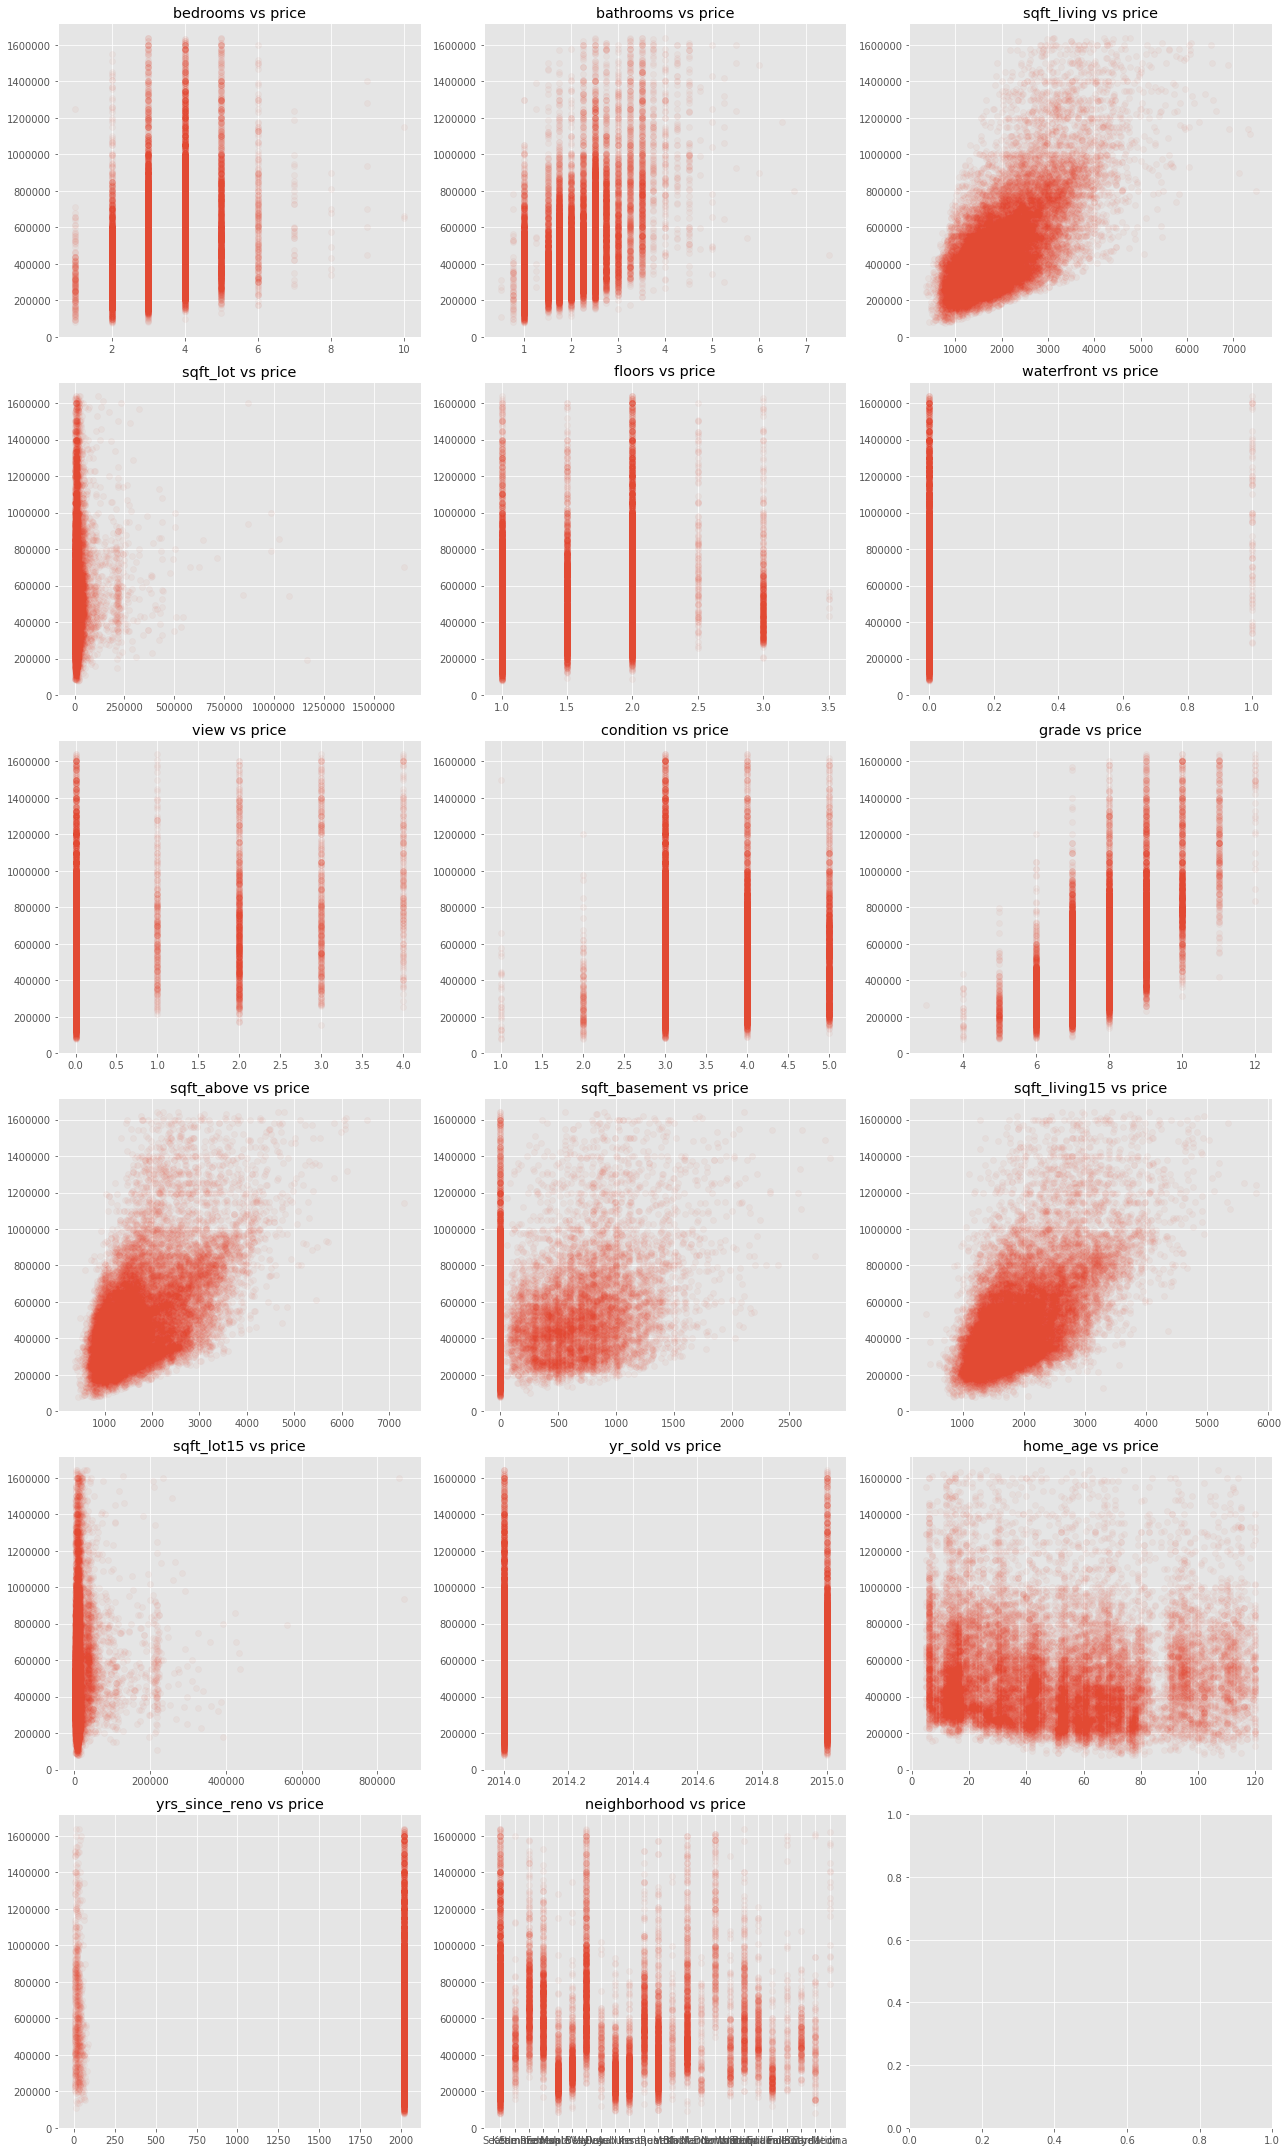

In [235]:
pred_cols = [col for col in df.columns if col != 'price']
fig, axes = plt.subplots(6,3, figsize=(18,30))
for i,col in enumerate(pred_cols):
    axes[i//3,i%3].scatter(col, 'price', data=df, alpha=.05)
    axes[i//3,i%3].set_title(f'{col} vs price')
plt.tight_layout()
plt.show()

In [236]:
#Appears to be a linear relationship between price and the following variables:
#bathrooms
#sqft_living
#sqft_lot (somewhat unclear above)
#grade
#sqft_above
#sqft_basement
#sqft_living15

In [237]:
#Grouping variables by type
#Determining this based on 'cloud' scatter v bar appearance
#Keeping yrs_since_reno as continuous as the '2000' year is for no reno and the left side of the graph seems more cloud-like

cat_vars = ['price','view','condition','grade','neighborhood','bedrooms', 'bathrooms','floors',
           'yr_sold']
cont_vars = ['price','sqft_living','sqft_lot',
             'sqft_above','sqft_basement','sqft_living15',
             'sqft_lot15','yr_sold','home_age','yrs_since_reno']

## Joint Plots (Continous Variables) 

In [238]:
#checking for linearity using joint plots
#excluding neighborhoods from this as we have yet to create dummy variables and dtype = object 

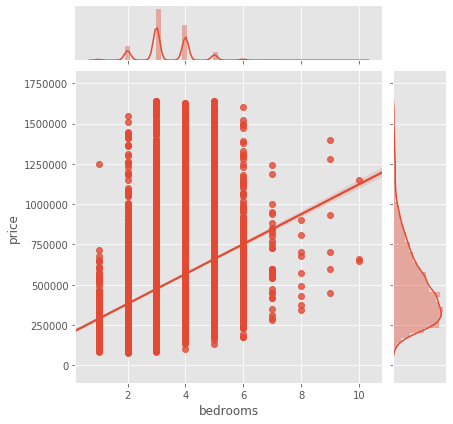

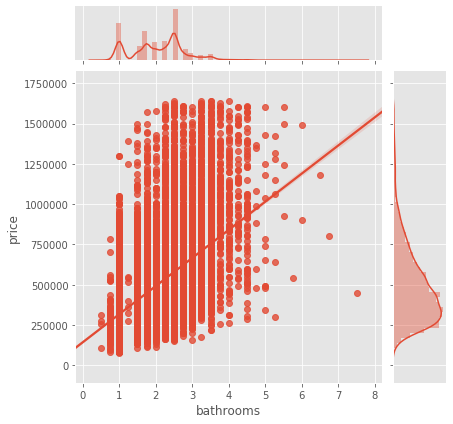

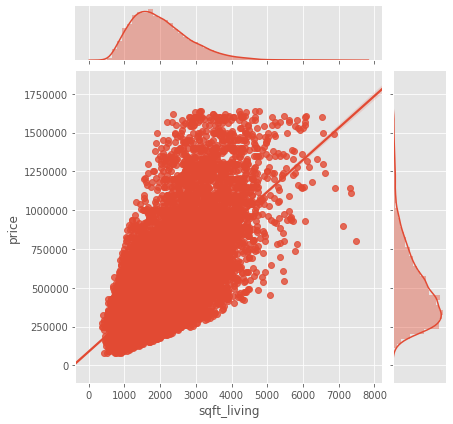

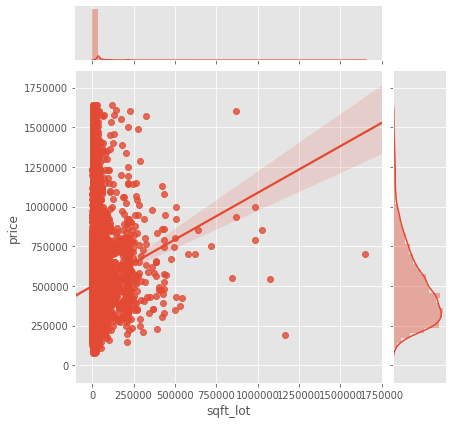

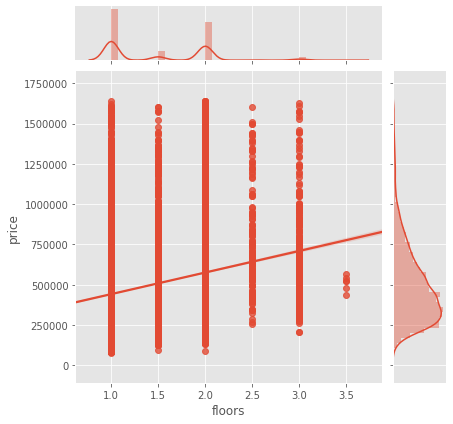

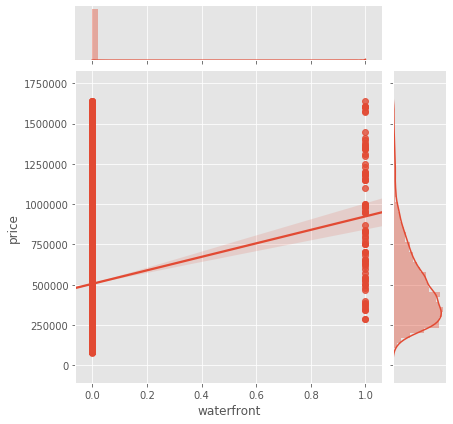

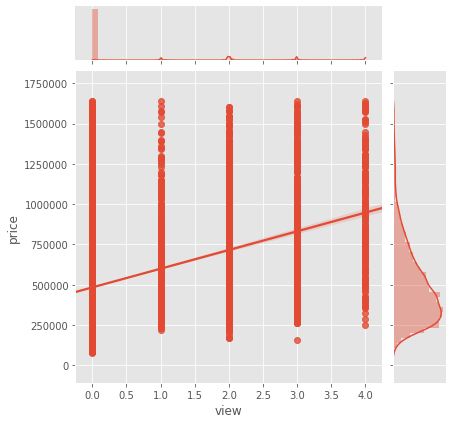

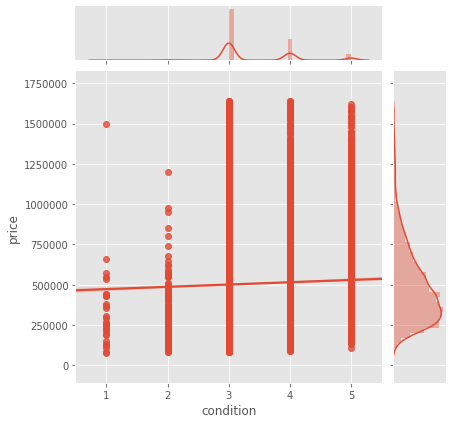

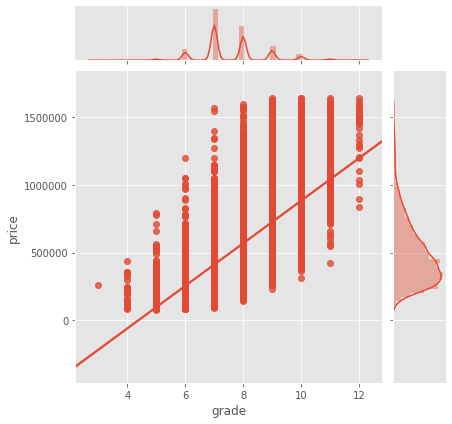

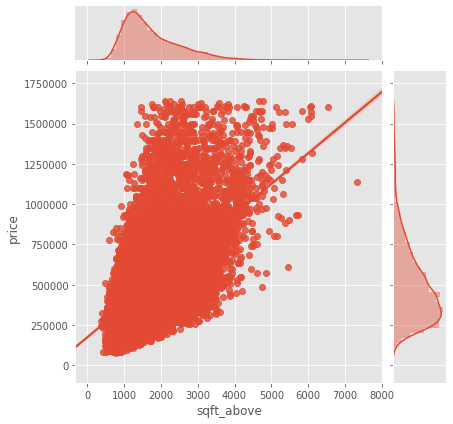

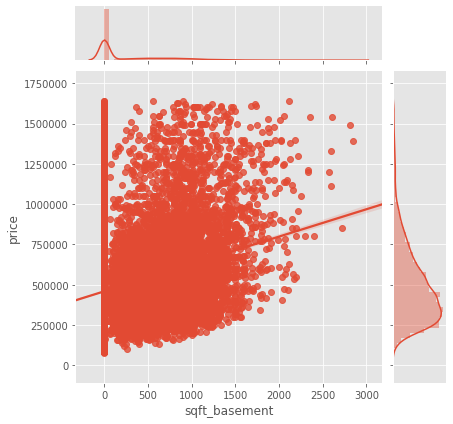

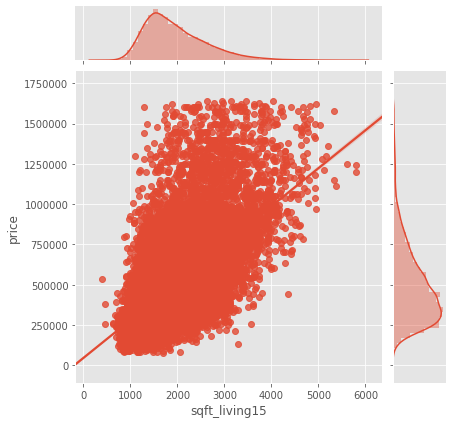

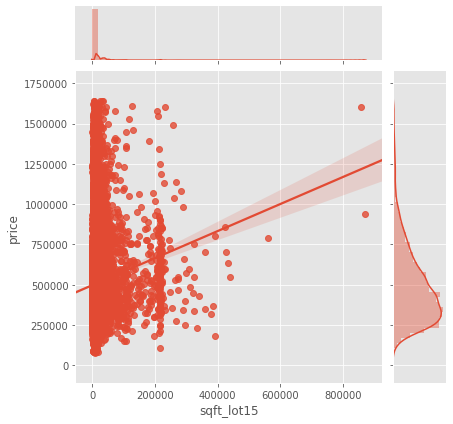

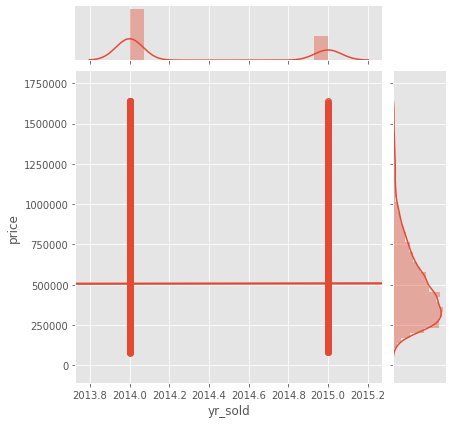

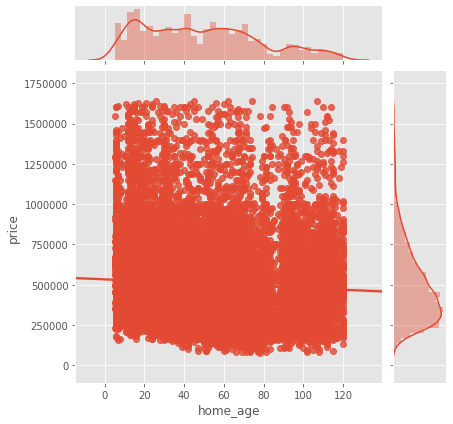

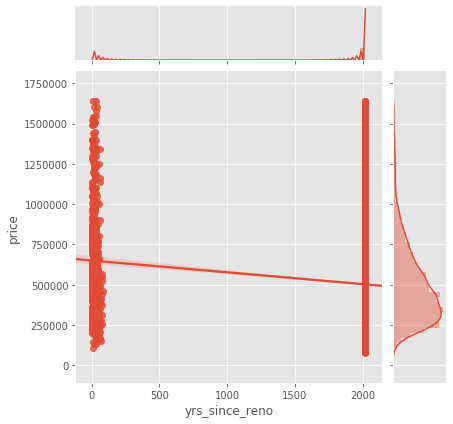

In [239]:
for column in df.columns[1:17]:
    sns.jointplot(column,'price', data=df, kind='reg')
    plt.show()


In [240]:
#Appears to be a linear relationship between price and the following variables:

#'bedrooms',
#'bathrooms',
#'sqft_living',
#'sqft_lot',
#'floors',
#'waterfront',
#'view',
#'grade',
#'sqft_above',
#'sqft_basement',
#'sqft_living15',
#'sqft_lot15'

## Correlation

In [241]:
#Check for colinearity between any of the variables

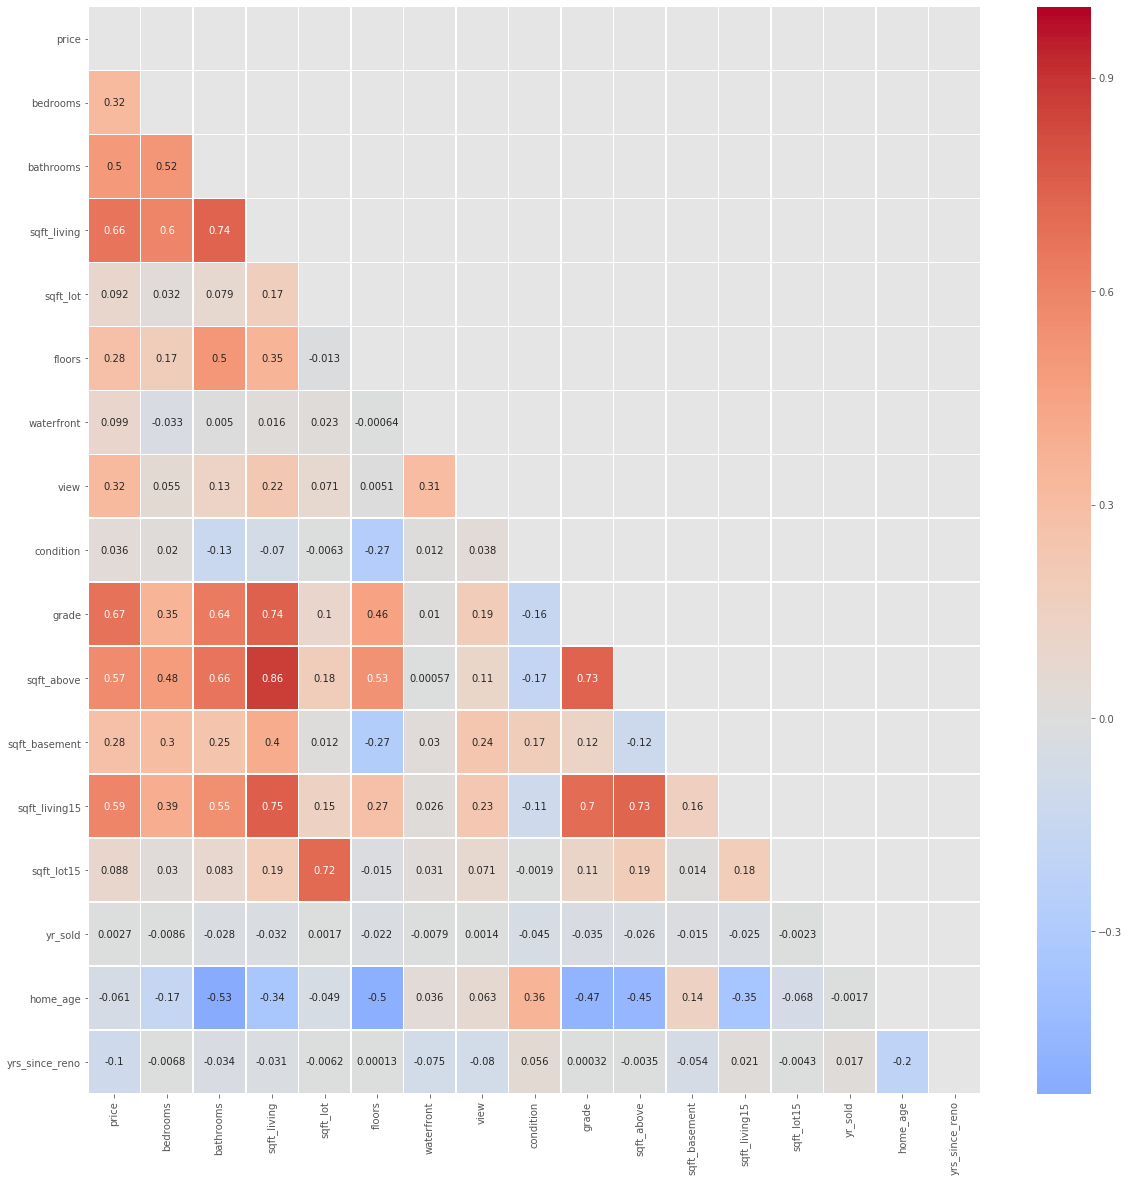

In [242]:
corr = df.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True

f, ax = plt.subplots(figsize=(20, 20))

sns.heatmap(corr, mask=mask, cmap='coolwarm', vmax=1, center=0,
            linewidths=.5,annot=True);
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5);

In [243]:
df.corr()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,sqft_living15,sqft_lot15,yr_sold,home_age,yrs_since_reno
price,1.000000,0.319272,0.495672,0.664559,0.091676,0.278275,0.099033,0.316043,0.035706,0.672348,0.566770,0.278203,0.594884,0.088142,0.002696,-0.060540,-0.100176
bedrooms,0.319272,1.000000,0.517765,0.599154,0.031999,0.172730,-0.033038,0.055232,0.020425,0.349732,0.484864,0.298246,0.393052,0.030234,-0.008554,-0.166098,-0.006758
bathrooms,0.495672,0.517765,1.000000,0.735637,0.079015,0.504592,0.004971,0.134434,-0.134557,0.640299,0.660057,0.248658,0.549354,0.082618,-0.027940,-0.528157,-0.034271
sqft_living,0.664559,0.599154,0.735637,1.000000,0.169571,0.349756,0.015646,0.218579,-0.070272,0.738143,0.863166,0.399903,0.751807,0.185036,-0.031881,-0.343099,-0.030825
sqft_lot,0.091676,0.031999,0.079015,0.169571,1.000000,-0.012954,0.022896,0.070951,-0.006331,0.103244,0.177139,0.011955,0.145290,0.719153,0.001689,-0.048901,-0.006156
floors,0.278275,0.172730,0.504592,0.349756,-0.012954,1.000000,-0.000644,0.005137,-0.270654,0.457581,0.528635,-0.271718,0.272684,-0.014895,-0.021536,-0.498630,0.000135
waterfront,0.099033,-0.033038,0.004971,0.015646,0.022896,-0.000644,1.000000,0.305814,0.012297,0.010119,0.000566,0.029745,0.025527,0.030613,-0.007913,0.036354,-0.074926
view,0.316043,0.055232,0.134434,0.218579,0.070951,0.005137,0.305814,1.000000,0.037775,0.190544,0.106049,0.237389,0.231593,0.070735,0.001370,0.063009,-0.080489
condition,0.035706,0.020425,-0.134557,-0.070272,-0.006331,-0.270654,0.012297,0.037775,1.000000,-0.160626,-0.172193,0.174366,-0.107225,-0.001922,-0.045152,0.357692,0.055785
grade,0.672348,0.349732,0.640299,0.738143,0.103244,0.457581,0.010119,0.190544,-0.160626,1.000000,0.733480,0.120304,0.697199,0.114321,-0.034953,-0.470104,0.000321


In [244]:
#Columns with high correlation (>0.7)

for column in df.corr().columns:
    all_other_rows = (list(df.corr().columns))
    all_other_rows.remove(column)
    corr_df = df.corr()[df.corr().index.isin(list(all_other_rows))]
    if len((corr_df[column][corr_df[column]>0.7]))>0:
        print("Variable:",column)
        print(corr_df[column][corr_df[column]>0.7])
        print()
    else:
        pass


Variable: bathrooms
sqft_living    0.735637
Name: bathrooms, dtype: float64

Variable: sqft_living
bathrooms        0.735637
grade            0.738143
sqft_above       0.863166
sqft_living15    0.751807
Name: sqft_living, dtype: float64

Variable: sqft_lot
sqft_lot15    0.719153
Name: sqft_lot, dtype: float64

Variable: grade
sqft_living    0.738143
sqft_above     0.733480
Name: grade, dtype: float64

Variable: sqft_above
sqft_living      0.863166
grade            0.733480
sqft_living15    0.727039
Name: sqft_above, dtype: float64

Variable: sqft_living15
sqft_living    0.751807
sqft_above     0.727039
Name: sqft_living15, dtype: float64

Variable: sqft_lot15
sqft_lot    0.719153
Name: sqft_lot15, dtype: float64



In [245]:
#Potential colinearity between the above metrics

# Create Dummy Variables

In [246]:
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,sqft_living15,sqft_lot15,yr_sold,home_age,yrs_since_reno,neighborhood
0,221900.0,3,1.00,1180,5650,1.0,0.0,0.0,3,7,1180,0,1340,5650,2014,65,2020,Seattle
1,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,3,7,2170,400,1690,7639,2014,69,29,Seattle
2,180000.0,2,1.00,770,10000,1.0,0.0,0.0,3,6,770,0,2720,8062,2015,87,2020,Kenmore
3,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,5,7,1050,910,1360,5000,2014,55,2020,Seattle
4,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,3,8,1680,0,1800,7503,2015,33,2020,Sammamish


In [247]:
cont_vars

['price',
 'sqft_living',
 'sqft_lot',
 'sqft_above',
 'sqft_basement',
 'sqft_living15',
 'sqft_lot15',
 'yr_sold',
 'home_age',
 'yrs_since_reno']

In [248]:
cat_vars

['price',
 'view',
 'condition',
 'grade',
 'neighborhood',
 'bedrooms',
 'bathrooms',
 'floors',
 'yr_sold']

In [249]:
#Creating new df to preserve data

df_preprocessed = df.copy()

In [250]:
df_preprocessed

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,sqft_living15,sqft_lot15,yr_sold,home_age,yrs_since_reno,neighborhood
0,221900.0,3,1.00,1180,5650,1.0,0.0,0.0,3,7,1180,0,1340,5650,2014,65,2020,Seattle
1,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,3,7,2170,400,1690,7639,2014,69,29,Seattle
2,180000.0,2,1.00,770,10000,1.0,0.0,0.0,3,6,770,0,2720,8062,2015,87,2020,Kenmore
3,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,5,7,1050,910,1360,5000,2014,55,2020,Seattle
4,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,3,8,1680,0,1800,7503,2015,33,2020,Sammamish
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21183,360000.0,3,2.50,1530,1131,3.0,0.0,0.0,3,8,1530,0,1530,1509,2014,11,2020,Seattle
21184,400000.0,4,2.50,2310,5813,2.0,0.0,0.0,3,8,2310,0,1830,7200,2015,6,2020,Seattle
21185,402101.0,2,0.75,1020,1350,2.0,0.0,0.0,3,7,1020,0,1020,2007,2014,11,2020,Seattle
21186,400000.0,3,2.50,1600,2388,2.0,0.0,0.0,3,8,1600,0,1410,1287,2015,16,2020,Issaquah


In [251]:
#converting category columns to objects 

for column in cat_vars[1:]:
    df_preprocessed[column] = df_preprocessed[column].astype(str)
    
df_preprocessed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21188 entries, 0 to 21187
Data columns (total 18 columns):
price             21188 non-null float64
bedrooms          21188 non-null object
bathrooms         21188 non-null object
sqft_living       21188 non-null int64
sqft_lot          21188 non-null int64
floors            21188 non-null object
waterfront        21188 non-null float64
view              21188 non-null object
condition         21188 non-null object
grade             21188 non-null object
sqft_above        21188 non-null int64
sqft_basement     21188 non-null int64
sqft_living15     21188 non-null int64
sqft_lot15        21188 non-null int64
yr_sold           21188 non-null object
home_age          21188 non-null int64
yrs_since_reno    21188 non-null int64
neighborhood      21188 non-null object
dtypes: float64(2), int64(8), object(8)
memory usage: 2.9+ MB


In [252]:
df_preprocessed = pd.get_dummies(df_preprocessed,drop_first=True)

In [253]:
#checking column names

df_preprocessed.columns

Index(['price', 'sqft_living', 'sqft_lot', 'waterfront', 'sqft_above',
       'sqft_basement', 'sqft_living15', 'sqft_lot15', 'home_age',
       'yrs_since_reno', 'bedrooms_10', 'bedrooms_2', 'bedrooms_3',
       'bedrooms_4', 'bedrooms_5', 'bedrooms_6', 'bedrooms_7', 'bedrooms_8',
       'bedrooms_9', 'bathrooms_0.75', 'bathrooms_1.0', 'bathrooms_1.25',
       'bathrooms_1.5', 'bathrooms_1.75', 'bathrooms_2.0', 'bathrooms_2.25',
       'bathrooms_2.5', 'bathrooms_2.75', 'bathrooms_3.0', 'bathrooms_3.25',
       'bathrooms_3.5', 'bathrooms_3.75', 'bathrooms_4.0', 'bathrooms_4.25',
       'bathrooms_4.5', 'bathrooms_4.75', 'bathrooms_5.0', 'bathrooms_5.25',
       'bathrooms_5.5', 'bathrooms_5.75', 'bathrooms_6.0', 'bathrooms_6.5',
       'bathrooms_6.75', 'bathrooms_7.5', 'floors_1.5', 'floors_2.0',
       'floors_2.5', 'floors_3.0', 'floors_3.5', 'view_1.0', 'view_2.0',
       'view_3.0', 'view_4.0', 'condition_2', 'condition_3', 'condition_4',
       'condition_5', 'grade_11', 'grade

In [254]:
#removing spaces from column names

df_preprocessed.columns = df_preprocessed.columns.str.replace(' ', '_')

In [255]:
#removing periods from column names

df_preprocessed.columns = df_preprocessed.columns.str.replace('.', '_')

In [256]:
#checking column names

df_preprocessed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21188 entries, 0 to 21187
Data columns (total 90 columns):
price                         21188 non-null float64
sqft_living                   21188 non-null int64
sqft_lot                      21188 non-null int64
waterfront                    21188 non-null float64
sqft_above                    21188 non-null int64
sqft_basement                 21188 non-null int64
sqft_living15                 21188 non-null int64
sqft_lot15                    21188 non-null int64
home_age                      21188 non-null int64
yrs_since_reno                21188 non-null int64
bedrooms_10                   21188 non-null uint8
bedrooms_2                    21188 non-null uint8
bedrooms_3                    21188 non-null uint8
bedrooms_4                    21188 non-null uint8
bedrooms_5                    21188 non-null uint8
bedrooms_6                    21188 non-null uint8
bedrooms_7                    21188 non-null uint8
bedrooms_8          

# Train-Test Split

In [257]:
# Import
from sklearn.model_selection import train_test_split

In [258]:
# Defining the problem
y = df_preprocessed.price
X = df_preprocessed.drop('price',axis=1)

In [259]:
#split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [260]:
#Merging for modeling

train_df = X_train.copy()
train_df['price'] = y_train
train_df.head()

,sqft_living,sqft_lot,waterfront,sqft_above,sqft_basement,sqft_living15,sqft_lot15,home_age,yrs_since_reno,bedrooms_10,...,neighborhood_Mercer_Island,neighborhood_North_Bend,neighborhood_Redmond,neighborhood_Renton,neighborhood_Sammamish,neighborhood_Seattle,neighborhood_Snoqualmie,neighborhood_Vashon,neighborhood_Woodinville,price
6660,2360,6000,0.0,1280,1080,1700,3460,65,2020,0,...,0,0,0,0,0,1,0,0,0,700000.0
7152,1570,8210,0.0,1150,420,1680,8196,68,2020,0,...,0,0,0,0,0,1,0,0,0,506000.0
8824,1090,1357,0.0,1090,0,1078,1318,30,2020,0,...,0,0,0,0,0,0,0,0,0,249000.0
9514,1360,10742,0.0,960,400,1830,9000,49,2020,0,...,0,0,0,1,0,0,0,0,0,296000.0
12618,3830,10005,0.0,3830,0,2555,5204,19,2020,0,...,0,0,0,0,1,0,0,0,0,860000.0


# Baseline Model

In [261]:
outcome = 'price'
x_cols = list(X_train.columns)

In [262]:
predictors = '+'.join(x_cols)
formula = outcome + '~' + predictors

In [263]:
model = ols(formula=formula, data=train_df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.753
Model:                            OLS   Adj. R-squared:                  0.752
Method:                 Least Squares   F-statistic:                     598.2
Date:                Sat, 24 Oct 2020   Prob (F-statistic):               0.00
Time:                        12:38:06   Log-Likelihood:            -2.2342e+05
No. Observations:               16950   AIC:                         4.470e+05
Df Residuals:                   16863   BIC:                         4.477e+05
Df Model:                          86                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept                  -2.451e+04   8.15e+04     -0.301      0.764   -1.84e+05    1.35e+05
sqft_living                   56.6383      1.793     31.596      0.000      53.125      60.152
sqft_lot                       0.1948      0.035      5.602      0.000       0.127       0.263
waterfront                   1.76e+05   1.89e+04      9.297      0.000    1.39e+05    2.13e+05
sqft_above                    28.7786      1.847     15.584      0.000      25.159      32.398
sqft_basement                 27.8596      2.058     13.537      0.000      23.826      31.894
sqft_living15                 40.9185      2.720     15.045      0.000      35.588      46.249
sqft_lot15                    -0.1274      0.054     -2.366      0.018      -0.233      -0.022
home_age                    1766.7319     60.315     29.292      0.000    1648.508    1884.956
yrs_since_reno               -12.7305      2.985     -4.265      0.000     -18.582      -6.879
bedrooms_10                -2.917e+04   7.75e+04     -0.376      0.707   -1.81e+05    1.23e+05
bedrooms_2                  1.485e+04   1.12e+04      1.325      0.185   -7108.836    3.68e+04
bedrooms_3                 -1315.1936   1.12e+04     -0.117      0.907   -2.33e+04    2.07e+04
bedrooms_4                 -1.459e+04   1.15e+04     -1.272      0.204   -3.71e+04    7901.315
bedrooms_5                 -2.983e+04   1.21e+04     -2.463      0.014   -5.36e+04   -6085.437
bedrooms_6                  -6.07e+04   1.49e+04     -4.086      0.000   -8.98e+04   -3.16e+04
bedrooms_7                 -9.797e+04   3.14e+04     -3.125      0.002   -1.59e+05   -3.65e+04
bedrooms_8                 -5.629e+04   5.45e+04     -1.033      0.301   -1.63e+05    5.05e+04
bedrooms_9                  7.585e+04   5.95e+04      1.274      0.203   -4.08e+04    1.93e+05
bathrooms_0_75              6.805e+04   7.65e+04      0.890      0.373   -8.18e+04    2.18e+05
bathrooms_1_0               7.753e+04   7.44e+04      1.042      0.298   -6.83e+04    2.23e+05
bathrooms_1_25              1.072e+05   8.72e+04      1.229      0.219   -6.38e+04    2.78e+05
bathrooms_1_5               8.564e+04   7.45e+04      1.149      0.250   -6.04e+04    2.32e+05
bathrooms_1_75              9.727e+04   7.45e+04      1.306      0.192   -4.87e+04    2.43e+05
bathrooms_2_0               1.037e+05   7.45e+04      1.391      0.164   -4.24e+04     2.5e+05
bathrooms_2_25               1.06e+05   7.45e+04      1.423      0.155      -4e+04    2.52e+05
bathrooms_2_5               1.067e+05   7.45e+04      1.432      0.152   -3.93e+04    2.53e+05
bathrooms_2_75              1.252e+05   7.46e+04      1.679      0.093    -2.1e+04    2.71e+05
bathrooms_3_0               1.336e+05   7.47e+04      1.790      0.074   -1.27e+04     2.8e+05
bathrooms_3_25              1.704e+05   7.4

In [264]:
from sklearn.linear_model import LinearRegression 
linreg = LinearRegression() 
linreg.fit(X_train, y_train)
y_hat_train = linreg.predict(X_train)
y_hat_test = linreg.predict(X_test)

In [265]:
from sklearn.metrics import mean_squared_error
train_mse = mean_squared_error(y_train, y_hat_train) 
test_mse = mean_squared_error(y_test, y_hat_test) 
print('Train Mean Squarred Error:', train_mse) 
print('Test Mean Squarred Error:', test_mse)

Train Mean Squarred Error: 16453640573.431189
Test Mean Squarred Error: 17886783712.90501


In [266]:
test_mse-train_mse #large difference in RMSEs

1433143139.4738216

In [267]:
#R-sq is low at 0.753 (adj is 0.752)
#Multiple variables with a p-value greater than 0.05

print(("number of features w/p-value > 0.05: ") + str(len(model.pvalues[1:][model.pvalues>0.05])))
print(("total number of features: ") + str(len(x_cols)))

number of features w/p-value > 0.05: 23
total number of features: 89


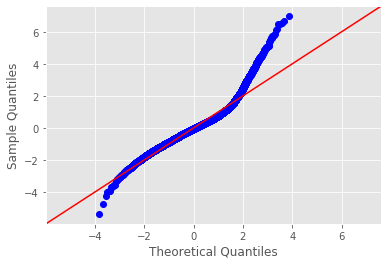

In [268]:
#Skewed distribution of residuals

plt.style.use('ggplot')

resid = model.resid

fig = sm.graphics.qqplot(resid, dist=stats.norm, line='45', fit=True)

# Model 2: Dropping high p-value features

In [269]:
model.pvalues[1:][(model.pvalues>0.05)]

bedrooms_10              0.706598
bedrooms_2               0.185023
bedrooms_3               0.906780
bedrooms_4               0.203564
bedrooms_8               0.301422
bedrooms_9               0.202677
bathrooms_0_75           0.373441
bathrooms_1_0            0.297536
bathrooms_1_25           0.219206
bathrooms_1_5            0.250470
bathrooms_1_75           0.191612
bathrooms_2_0            0.164183
bathrooms_2_25           0.154761
bathrooms_2_5            0.152176
bathrooms_2_75           0.093232
bathrooms_3_0            0.073540
bathrooms_4_75           0.104624
bathrooms_5_75           0.544828
bathrooms_6_5            0.345963
bathrooms_7_5            0.479723
floors_3_5               0.160004
grade_3                  0.219576
neighborhood_Enumclaw    0.210342
dtype: float64

In [270]:
remove_features = list(model.pvalues[1:][(model.pvalues>0.05)].index)
remove_features

['bedrooms_10',
 'bedrooms_2',
 'bedrooms_3',
 'bedrooms_4',
 'bedrooms_8',
 'bedrooms_9',
 'bathrooms_0_75',
 'bathrooms_1_0',
 'bathrooms_1_25',
 'bathrooms_1_5',
 'bathrooms_1_75',
 'bathrooms_2_0',
 'bathrooms_2_25',
 'bathrooms_2_5',
 'bathrooms_2_75',
 'bathrooms_3_0',
 'bathrooms_4_75',
 'bathrooms_5_75',
 'bathrooms_6_5',
 'bathrooms_7_5',
 'floors_3_5',
 'grade_3',
 'neighborhood_Enumclaw']

In [271]:
removed_high_p_features_df = train_df[train_df.columns.difference(remove_features,sort=False)]
removed_high_p_features_df

,sqft_living,sqft_lot,waterfront,sqft_above,sqft_basement,sqft_living15,sqft_lot15,home_age,yrs_since_reno,bedrooms_5,...,neighborhood_Mercer_Island,neighborhood_North_Bend,neighborhood_Redmond,neighborhood_Renton,neighborhood_Sammamish,neighborhood_Seattle,neighborhood_Snoqualmie,neighborhood_Vashon,neighborhood_Woodinville,price
6660,2360,6000,0.0,1280,1080,1700,3460,65,2020,0,...,0,0,0,0,0,1,0,0,0,700000.0
7152,1570,8210,0.0,1150,420,1680,8196,68,2020,0,...,0,0,0,0,0,1,0,0,0,506000.0
8824,1090,1357,0.0,1090,0,1078,1318,30,2020,0,...,0,0,0,0,0,0,0,0,0,249000.0
9514,1360,10742,0.0,960,400,1830,9000,49,2020,0,...,0,0,0,1,0,0,0,0,0,296000.0
12618,3830,10005,0.0,3830,0,2555,5204,19,2020,0,...,0,0,0,0,1,0,0,0,0,860000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11284,2600,5390,0.0,1300,1300,2550,5600,60,2020,0,...,0,0,0,0,0,1,0,0,0,855000.0
11964,2080,12032,0.0,2080,0,2320,9900,42,2020,0,...,0,0,0,0,0,0,0,0,1,490000.0
5390,1700,8534,0.0,1700,0,2100,10443,67,2020,0,...,0,0,0,0,0,0,0,0,0,985000.0
860,3300,10514,0.0,3300,0,2820,11462,36,2020,0,...,0,0,0,0,1,0,0,0,0,785000.0


In [272]:
outcome = 'price'
x_cols_2 = list(removed_high_p_features_df.columns.drop('price'))

In [273]:
predictors2 = '+'.join(x_cols_2)
formula2 = outcome + '~' + predictors2

In [274]:
model2 = ols(formula=formula2, data=removed_high_p_features_df).fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.751
Model:                            OLS   Adj. R-squared:                  0.750
Method:                 Least Squares   F-statistic:                     795.9
Date:                Sat, 24 Oct 2020   Prob (F-statistic):               0.00
Time:                        12:38:06   Log-Likelihood:            -2.2349e+05
No. Observations:               16950   AIC:                         4.471e+05
Df Residuals:                   16885   BIC:                         4.476e+05
Df Model:                          64                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept                   8.854e+04    3.2e+04      2.763      0.006    2.57e+04    1.51e+05
sqft_living                   58.2481      1.543     37.761      0.000      55.225      61.272
sqft_lot                       0.2070      0.035      5.956      0.000       0.139       0.275
waterfront                  1.765e+05    1.9e+04      9.313      0.000    1.39e+05    2.14e+05
sqft_above                    26.7878      1.803     14.855      0.000      23.253      30.322
sqft_basement                 31.4600      1.938     16.236      0.000      27.662      35.258
sqft_living15                 40.6644      2.716     14.971      0.000      35.340      45.989
sqft_lot15                    -0.1253      0.054     -2.325      0.020      -0.231      -0.020
home_age                    1641.2926     57.672     28.459      0.000    1528.249    1754.336
yrs_since_reno               -15.9604      2.970     -5.373      0.000     -21.783     -10.138
bedrooms_5                 -1.748e+04   4186.877     -4.174      0.000   -2.57e+04   -9268.494
bedrooms_6                 -4.523e+04   9498.101     -4.762      0.000   -6.39e+04   -2.66e+04
bedrooms_7                  -8.82e+04   2.85e+04     -3.099      0.002   -1.44e+05   -3.24e+04
bathrooms_3_25               5.68e+04   6812.291      8.338      0.000    4.34e+04    7.02e+04
bathrooms_3_5               5.598e+04   6124.680      9.141      0.000     4.4e+04     6.8e+04
bathrooms_3_75              1.265e+05   1.33e+04      9.507      0.000       1e+05    1.53e+05
bathrooms_4_0               6.909e+04   1.44e+04      4.782      0.000    4.08e+04    9.74e+04
bathrooms_4_25              1.181e+05    2.1e+04      5.628      0.000     7.7e+04    1.59e+05
bathrooms_4_5               4.061e+04   1.77e+04      2.299      0.022    5986.778    7.52e+04
bathrooms_5_0               9.811e+04   4.14e+04      2.372      0.018     1.7e+04    1.79e+05
bathrooms_5_25              7.058e+04   5.33e+04      1.324      0.186   -3.39e+04    1.75e+05
bathrooms_5_5               3.569e+05   9.37e+04      3.809      0.000    1.73e+05    5.41e+05
bathrooms_6_0              -8.049e+05   1.32e+05     -6.083      0.000   -1.06e+06   -5.46e+05
bathrooms_6_75             -4.195e-09   4.69e-10     -8.951      0.000   -5.11e-09   -3.28e-09
floors_1_5                  3.537e+04   3957.767      8.938      0.000    2.76e+04    4.31e+04
floors_2_0                  3.867e+04   3200.317     12.083      0.000    3.24e+04    4.49e+04
floors_2_5                  8.937e+04   1.25e+04      7.177      0.000     6.5e+04    1.14e+05
floors_3_0                  8.941e+04   7088.196     12.614      0.000    7.55e+04    1.03e+05
view_1_0                    4.773e+04   8511.166      5.608      0.000     3.1e+04    6.44e+04
view_2_0                    5.093e+04   507

In [275]:
#Baseline model

#R-sq is low at 0.753 (adj is 0.752)
#Multiple variables with a p-value greater than 0.05

print(("number of features w/p-value > 0.05: ") + str(len(model.pvalues[1:][model.pvalues>0.05])))
print(("total number of features: ") + str(len(x_cols)))

number of features w/p-value > 0.05: 23
total number of features: 89


In [276]:
model2.pvalues[model2.pvalues>0.05]

bathrooms_5_25       0.185512
neighborhood_Kent    0.110141
dtype: float64

In [277]:
#Baseline model

#R-sq is slightly lower at 0.751 (adj is 0.750)
#Multiple variables with a p-value greater than 0.05

print(("number of features w/p-value > 0.05: ") + str(len(model2.pvalues[1:][model2.pvalues>0.05])))
print(("total number of features: ") + str(len(x_cols_2)))

number of features w/p-value > 0.05: 2
total number of features: 66


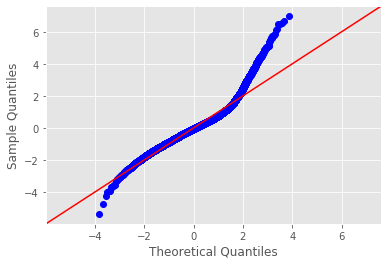

In [278]:
#Skewed distribution of residuals

plt.style.use('ggplot')

resid = model.resid

fig = sm.graphics.qqplot(resid, dist=stats.norm, line='45', fit=True)

In [279]:
X_train2 = removed_high_p_features_df.drop('price',axis=1)
y_train2 = removed_high_p_features_df.price

X_test2 = X_test[x_cols_2]
y_test2 = y_test.copy()

linreg2 = LinearRegression() 
linreg2.fit(X_train2, y_train2)
y_hat_train2 = linreg2.predict(X_train2)
y_hat_test2 = linreg2.predict(X_test2)

train_mse2 = mean_squared_error(y_train2, y_hat_train2) 
test_mse2 = mean_squared_error(y_test2, y_hat_test2) 
print('Train Mean Squarred Error:', train_mse2) 
print('Test Mean Squarred Error:', test_mse2)

test_mse2-train_mse2 #larger difference in RMSEs

Train Mean Squarred Error: 16592954064.657824
Test Mean Squarred Error: 18010350752.31446


1417396687.6566372

# Models 3 and 4: Focusing on features w/highest correlation

## Determining high correlation features

In [280]:
high_corr_df = removed_high_p_features_df.copy()
high_corr_df.head()

,sqft_living,sqft_lot,waterfront,sqft_above,sqft_basement,sqft_living15,sqft_lot15,home_age,yrs_since_reno,bedrooms_5,...,neighborhood_Mercer_Island,neighborhood_North_Bend,neighborhood_Redmond,neighborhood_Renton,neighborhood_Sammamish,neighborhood_Seattle,neighborhood_Snoqualmie,neighborhood_Vashon,neighborhood_Woodinville,price
6660,2360,6000,0.0,1280,1080,1700,3460,65,2020,0,...,0,0,0,0,0,1,0,0,0,700000.0
7152,1570,8210,0.0,1150,420,1680,8196,68,2020,0,...,0,0,0,0,0,1,0,0,0,506000.0
8824,1090,1357,0.0,1090,0,1078,1318,30,2020,0,...,0,0,0,0,0,0,0,0,0,249000.0
9514,1360,10742,0.0,960,400,1830,9000,49,2020,0,...,0,0,0,1,0,0,0,0,0,296000.0
12618,3830,10005,0.0,3830,0,2555,5204,19,2020,0,...,0,0,0,0,1,0,0,0,0,860000.0


In [281]:
#Finding coorelation of every feature and price

high_corr_df_v_price_only = high_corr_df.corr().loc[['price']].abs().stack().reset_index().sort_values(0, ascending=False)
high_corr_df_v_price_only.set_index('level_1',inplace=True)
# high_corr_df_v_price_only.reset_index(inplace=True,drop=True)
high_corr_df_v_price_only.drop('level_0',axis=1,inplace=True)
high_corr_df_v_price_only
high_corr_df_v_price_only.drop('price',axis=0,inplace=True)

# #Segmenting top 10 (price is first item)

high_corr_df_v_price_only[:10]


,0
level_1,
sqft_living,0.665511
sqft_living15,0.593581
sqft_above,0.566922
grade_7,0.338395
grade_9,0.332737
grade_11,0.291436
sqft_basement,0.276145
grade_6,0.262200
floors_2_0,0.254723


In [282]:
#Saving features

high_corr_feat = list(high_corr_df_v_price_only.index[:10])
high_corr_feat

['sqft_living',
 'sqft_living15',
 'sqft_above',
 'grade_7',
 'grade_9',
 'grade_11',
 'sqft_basement',
 'grade_6',
 'floors_2_0',
 'neighborhood_Bellevue']

## Model 3: Top 10 Correlated values

In [283]:
high_corr_feat_columns = high_corr_feat.copy()
high_corr_feat_columns.append('price')

In [284]:
#Re-running the model with these 10 features

high_corr_df = train_df[high_corr_feat_columns]

In [285]:
outcome = 'price'
x_cols_3 = list(high_corr_feat)

In [286]:
predictors3 = '+'.join(x_cols_3)
formula3 = outcome + '~' + predictors3

In [287]:
model3 = ols(formula=formula3, data=high_corr_df).fit()
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.524
Model:                            OLS   Adj. R-squared:                  0.523
Method:                 Least Squares   F-statistic:                     2069.
Date:                Sat, 24 Oct 2020   Prob (F-statistic):               0.00
Time:                        12:38:07   Log-Likelihood:            -2.2899e+05
No. Observations:               16950   AIC:                         4.580e+05
Df Residuals:                   16940   BIC:                         4.581e+05
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept              1.829e+05   6548.372     27.927      0.000     1.7e+05    1.96e+05
sqft_living              91.5092      1.797     50.920      0.000      87.987      95.032
sqft_living15            52.7178      3.381     15.592      0.000      46.091      59.345
sqft_above               29.3377      2.159     13.591      0.000      25.107      33.569
grade_7               -8.245e+04   3516.831    -23.444      0.000   -8.93e+04   -7.56e+04
grade_9                7.344e+04   4815.407     15.251      0.000     6.4e+04    8.29e+04
grade_11               2.623e+05    1.3e+04     20.104      0.000    2.37e+05    2.88e+05
sqft_basement            62.1716      2.385     26.063      0.000      57.496      66.847
grade_6               -1.079e+05   5693.362    -18.954      0.000   -1.19e+05   -9.68e+04
floors_2_0            -3.186e+04   3691.071     -8.633      0.000   -3.91e+04   -2.46e+04
neighborhood_Bellevue   1.54e+05   5895.121     26.132      0.000    1.42e+05    1.66e+05
==============================================================================
Omnibus:                     3156.589   Durbin-Watson:                   2.024
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             7496.594
Skew:                           1.051   Prob(JB):                         0.00
Kurtosis:                       5.489   Cond. No.                     5.02e+16
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 8.45e-23. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [288]:
X_train3 = high_corr_df.drop('price',axis=1)
y_train3 = high_corr_df.price

X_test3 = X_test[x_cols_3]
y_test3 = y_test.copy()

linreg3 = LinearRegression() 
linreg3.fit(X_train3, y_train3)
y_hat_train3 = linreg3.predict(X_train3)
y_hat_test3 = linreg3.predict(X_test3)

train_mse3 = mean_squared_error(y_train3, y_hat_train3) 
test_mse3 = mean_squared_error(y_test3, y_hat_test3) 
print('Train Mean Squarred Error:', train_mse3) 
print('Test Mean Squarred Error:', test_mse3)

test_mse3-train_mse3

Train Mean Squarred Error: 31746532102.488483
Test Mean Squarred Error: 33709159569.87693


1962627467.3884468

In [289]:
#R2 decreased significantly. Re-trying with more features (top 15)

## Model 3: Top 15 Correlated values

In [290]:
high_corr_feat_top15 = list(high_corr_df_v_price_only.index[:15])
high_corr_feat_top15

['sqft_living',
 'sqft_living15',
 'sqft_above',
 'grade_7',
 'grade_9',
 'grade_11',
 'sqft_basement',
 'grade_6',
 'floors_2_0',
 'neighborhood_Bellevue',
 'bathrooms_3_5',
 'neighborhood_Kent',
 'neighborhood_Mercer_Island',
 'bathrooms_3_25',
 'view_4_0']

In [291]:
high_corr_feat_top15_columns = high_corr_feat_top15.copy()
high_corr_feat_top15_columns.append('price')

In [292]:
high_corr_df_top_15 = train_df[high_corr_feat_top15_columns]
high_corr_df_top_15.head()

,sqft_living,sqft_living15,sqft_above,grade_7,grade_9,grade_11,sqft_basement,grade_6,floors_2_0,neighborhood_Bellevue,bathrooms_3_5,neighborhood_Kent,neighborhood_Mercer_Island,bathrooms_3_25,view_4_0,price
6660,2360,1700,1280,1,0,0,1080,0,0,0,0,0,0,0,0,700000.0
7152,1570,1680,1150,0,0,0,420,0,0,0,0,0,0,0,0,506000.0
8824,1090,1078,1090,1,0,0,0,0,1,0,0,0,0,0,0,249000.0
9514,1360,1830,960,1,0,0,400,0,0,0,0,0,0,0,0,296000.0
12618,3830,2555,3830,0,0,0,0,0,1,0,0,0,0,1,0,860000.0


In [293]:
outcome = 'price'
x_cols_4 = list(high_corr_feat_top15)

In [294]:
x_cols_4

['sqft_living',
 'sqft_living15',
 'sqft_above',
 'grade_7',
 'grade_9',
 'grade_11',
 'sqft_basement',
 'grade_6',
 'floors_2_0',
 'neighborhood_Bellevue',
 'bathrooms_3_5',
 'neighborhood_Kent',
 'neighborhood_Mercer_Island',
 'bathrooms_3_25',
 'view_4_0']

In [295]:
predictors4 = '+'.join(x_cols_4)
formula4 = outcome + '~' + predictors4

In [296]:
model4 = ols(formula=formula4, data=high_corr_df_top_15).fit()
model4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.576
Model:                            OLS   Adj. R-squared:                  0.576
Method:                 Least Squares   F-statistic:                     1645.
Date:                Sat, 24 Oct 2020   Prob (F-statistic):               0.00
Time:                        12:38:07   Log-Likelihood:            -2.2800e+05
No. Observations:               16950   AIC:                         4.560e+05
Df Residuals:                   16935   BIC:                         4.561e+05
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept                   2.049e+05   6212.353     32.988      0.000    1.93e+05    2.17e+05
sqft_living                   83.4776      1.742     47.916      0.000      80.063      86.892
sqft_living15                 44.7947      3.211     13.952      0.000      38.501      51.088
sqft_above                    33.3373      2.043     16.319      0.000      29.333      37.342
grade_7                    -7.099e+04   3328.871    -21.324      0.000   -7.75e+04   -6.45e+04
grade_9                      6.41e+04   4549.203     14.091      0.000    5.52e+04     7.3e+04
grade_11                    2.297e+05   1.24e+04     18.583      0.000    2.05e+05    2.54e+05
sqft_basement                 50.1403      2.281     21.986      0.000      45.670      54.611
grade_6                    -1.071e+05   5373.525    -19.932      0.000   -1.18e+05   -9.66e+04
floors_2_0                 -2.751e+04   3500.620     -7.857      0.000   -3.44e+04   -2.06e+04
neighborhood_Bellevue       1.557e+05   5579.852     27.903      0.000    1.45e+05    1.67e+05
bathrooms_3_5               7.104e+04   7720.486      9.201      0.000    5.59e+04    8.62e+04
neighborhood_Kent          -1.674e+05   5615.099    -29.808      0.000   -1.78e+05   -1.56e+05
neighborhood_Mercer_Island  3.035e+05   1.27e+04     23.987      0.000    2.79e+05    3.28e+05
bathrooms_3_25              9.426e+04   8673.691     10.868      0.000    7.73e+04    1.11e+05
view_4_0                    2.606e+05    1.3e+04     20.068      0.000    2.35e+05    2.86e+05
==============================================================================
Omnibus:                     3224.458   Durbin-Watson:                   2.018
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             8411.817
Skew:                           1.038   Prob(JB):                         0.00
Kurtosis:                       5.757   Cond. No.                     5.03e+16
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 8.43e-23. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [297]:
X_train4 = high_corr_df_top_15.drop('price',axis=1)
y_train4 = high_corr_df_top_15.price

X_test4 = X_test[x_cols_4]
y_test4 = y_test.copy()

linreg4 = LinearRegression() 
linreg4.fit(X_train4, y_train4)
y_hat_train4 = linreg4.predict(X_train4)
y_hat_test4 = linreg4.predict(X_test4)

train_mse4 = mean_squared_error(y_train4, y_hat_train4) 
test_mse4 = mean_squared_error(y_test4, y_hat_test4) 
print('Train Mean Squarred Error:', train_mse4) 
print('Test Mean Squarred Error:', test_mse4)

test_mse4-train_mse4

Train Mean Squarred Error: 28245699023.729237
Test Mean Squarred Error: 29393861059.217392


1148162035.4881554

In [298]:
#R2 is still low, howeer this model yielded the lowest RMSE difference. 

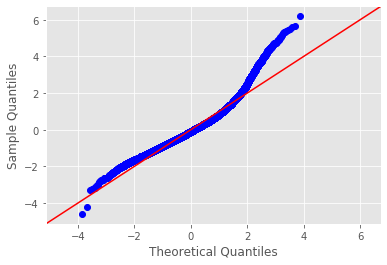

In [299]:
#While the distribution remains skewed, it does appear more normal than the baseline model. 
#baseline model shown for reference

plt.style.use('ggplot')

resid = model4.resid

fig = sm.graphics.qqplot(resid, dist=stats.norm, line='45', fit=True)

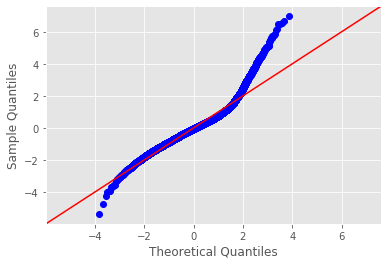

In [300]:
#Skewed distribution of residuals

plt.style.use('ggplot')

resid = model.resid

fig = sm.graphics.qqplot(resid, dist=stats.norm, line='45', fit=True)

# Model 5: Determining continuous features w/linear relationship to price (drop basement sqft)

## Investigation

In [301]:
#Further investigating remaining features 

In [302]:
list(high_corr_df_top_15.columns)

['sqft_living',
 'sqft_living15',
 'sqft_above',
 'grade_7',
 'grade_9',
 'grade_11',
 'sqft_basement',
 'grade_6',
 'floors_2_0',
 'neighborhood_Bellevue',
 'bathrooms_3_5',
 'neighborhood_Kent',
 'neighborhood_Mercer_Island',
 'bathrooms_3_25',
 'view_4_0',
 'price']

In [303]:
cont_vars_refined = ['sqft_living','sqft_living15','sqft_above','sqft_basement']
cat_vars_refined = [ 'grade_7', 'grade_9', 'grade_11', 'grade_6', 'floors_2_0', 'neighborhood_Bellevue', 
                    'bathrooms_3_5', 'neighborhood_Kent', 'neighborhood_Mercer_Island', 'bathrooms_3_25', 
                    'view_4_0']

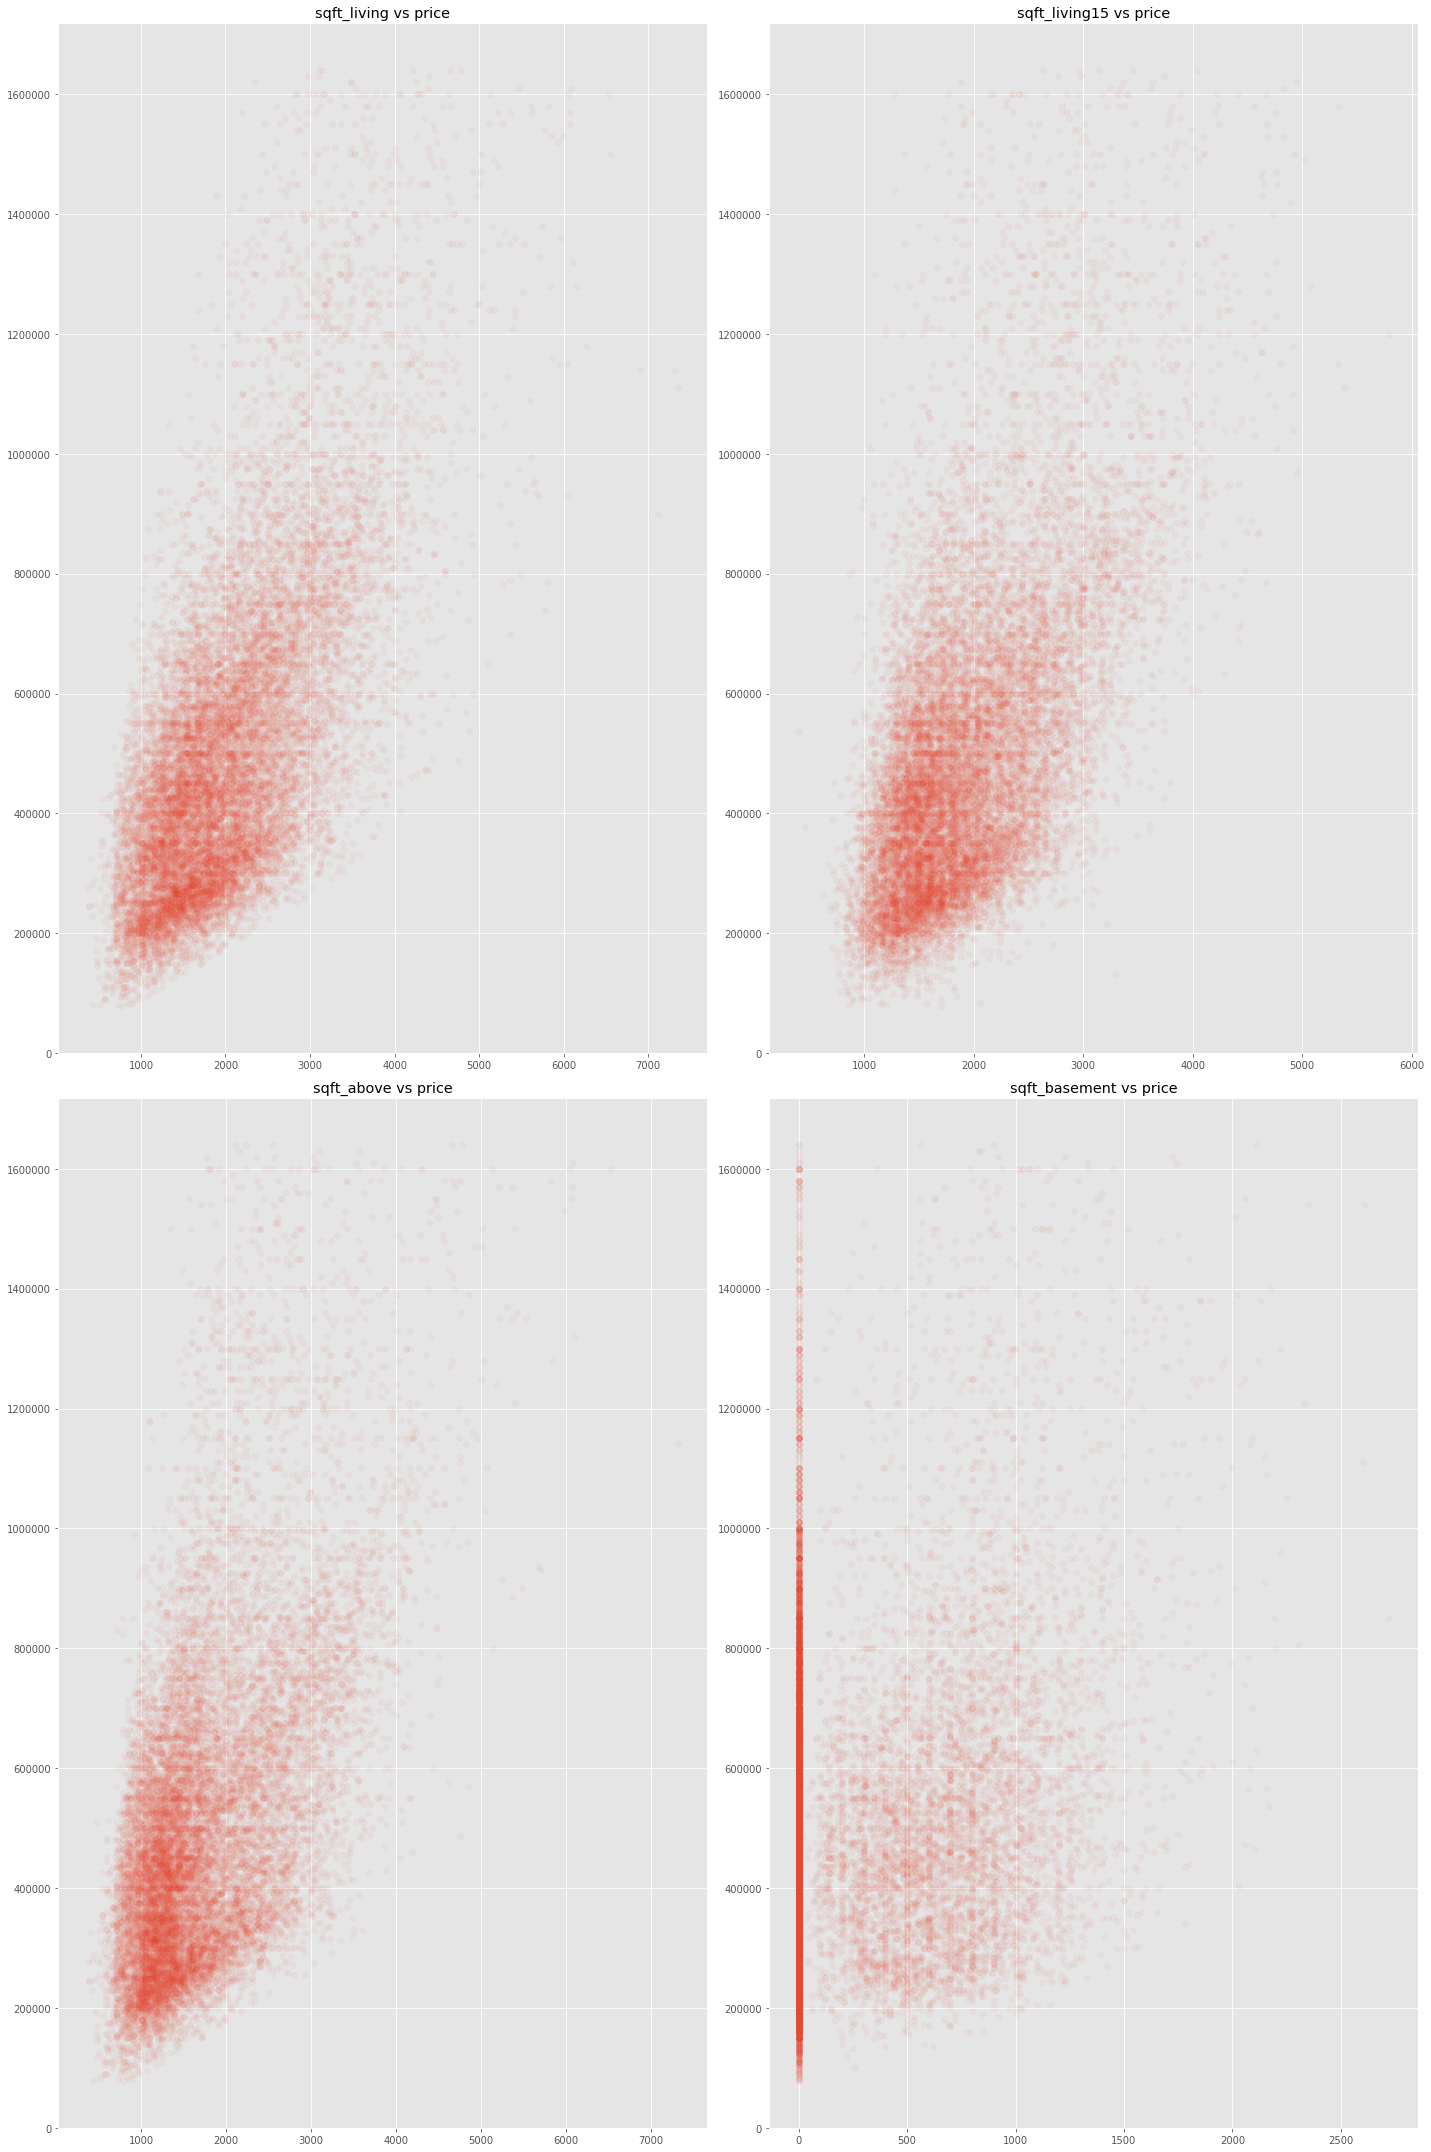

In [304]:
#Checking for linearity in continuous variables
fig, axes = plt.subplots(2,2, figsize=(20,30))
for i,col in enumerate(cont_vars_refined):
    axes[i//2,i%2].scatter(col, 'price', data=high_corr_df_top_15, alpha=.05)
    axes[i//2,i%2].set_title(f'{col} vs price')
plt.tight_layout()
plt.show()

In [305]:
#Simple linear regression for continuous variables

for col in cont_vars_refined:
    
    x = high_corr_df_top_15[col].values.reshape(-1, 1) 
    y = high_corr_df_top_15['price'].values.reshape(-1, 1) 
    model = LinearRegression().fit(x, y)
    r_sq = model.score(x, y)
    print(col,"v. price")
    print('r-squared:', round(r_sq,2))
    print("")

sqft_living v. price
r-squared: 0.44

sqft_living15 v. price
r-squared: 0.35

sqft_above v. price
r-squared: 0.32

sqft_basement v. price
r-squared: 0.08



In [306]:
#Very low r2 for sqft_basement
#Dropping this and re-running model

## Model: Dropping basement sqft

In [307]:
drop_sqft_basement_df = high_corr_df_top_15.copy()
drop_sqft_basement_df.drop('sqft_basement',axis=1)
drop_sqft_basement_df.head()

,sqft_living,sqft_living15,sqft_above,grade_7,grade_9,grade_11,sqft_basement,grade_6,floors_2_0,neighborhood_Bellevue,bathrooms_3_5,neighborhood_Kent,neighborhood_Mercer_Island,bathrooms_3_25,view_4_0,price
6660,2360,1700,1280,1,0,0,1080,0,0,0,0,0,0,0,0,700000.0
7152,1570,1680,1150,0,0,0,420,0,0,0,0,0,0,0,0,506000.0
8824,1090,1078,1090,1,0,0,0,0,1,0,0,0,0,0,0,249000.0
9514,1360,1830,960,1,0,0,400,0,0,0,0,0,0,0,0,296000.0
12618,3830,2555,3830,0,0,0,0,0,1,0,0,0,0,1,0,860000.0


In [308]:
outcome = 'price'
x_cols_5 = list(drop_sqft_basement_df.columns)
x_cols_5.remove('price')

In [309]:
predictors5 = '+'.join(x_cols_5)
formula5 = outcome + '~' + predictors5

In [310]:
model5 = ols(formula=formula5, data=drop_sqft_basement_df).fit()
model5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.576
Model:                            OLS   Adj. R-squared:                  0.576
Method:                 Least Squares   F-statistic:                     1645.
Date:                Sat, 24 Oct 2020   Prob (F-statistic):               0.00
Time:                        12:38:09   Log-Likelihood:            -2.2800e+05
No. Observations:               16950   AIC:                         4.560e+05
Df Residuals:                   16935   BIC:                         4.561e+05
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept                   2.049e+05   6212.353     32.988      0.000    1.93e+05    2.17e+05
sqft_living                   83.4776      1.742     47.916      0.000      80.063      86.892
sqft_living15                 44.7947      3.211     13.952      0.000      38.501      51.088
sqft_above                    33.3373      2.043     16.319      0.000      29.333      37.342
grade_7                    -7.099e+04   3328.871    -21.324      0.000   -7.75e+04   -6.45e+04
grade_9                      6.41e+04   4549.203     14.091      0.000    5.52e+04     7.3e+04
grade_11                    2.297e+05   1.24e+04     18.583      0.000    2.05e+05    2.54e+05
sqft_basement                 50.1403      2.281     21.986      0.000      45.670      54.611
grade_6                    -1.071e+05   5373.525    -19.932      0.000   -1.18e+05   -9.66e+04
floors_2_0                 -2.751e+04   3500.620     -7.857      0.000   -3.44e+04   -2.06e+04
neighborhood_Bellevue       1.557e+05   5579.852     27.903      0.000    1.45e+05    1.67e+05
bathrooms_3_5               7.104e+04   7720.486      9.201      0.000    5.59e+04    8.62e+04
neighborhood_Kent          -1.674e+05   5615.099    -29.808      0.000   -1.78e+05   -1.56e+05
neighborhood_Mercer_Island  3.035e+05   1.27e+04     23.987      0.000    2.79e+05    3.28e+05
bathrooms_3_25              9.426e+04   8673.691     10.868      0.000    7.73e+04    1.11e+05
view_4_0                    2.606e+05    1.3e+04     20.068      0.000    2.35e+05    2.86e+05
==============================================================================
Omnibus:                     3224.458   Durbin-Watson:                   2.018
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             8411.817
Skew:                           1.038   Prob(JB):                         0.00
Kurtosis:                       5.757   Cond. No.                     5.03e+16
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 8.43e-23. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [311]:
X_train5 = drop_sqft_basement_df.drop('price',axis=1)
y_train5 = drop_sqft_basement_df.price

X_test5 = X_test[x_cols_5]
y_test5 = y_test.copy()

linreg5 = LinearRegression() 
linreg5.fit(X_train5, y_train5)
y_hat_train5 = linreg5.predict(X_train5)
y_hat_test5 = linreg5.predict(X_test5)

train_mse5 = mean_squared_error(y_train5, y_hat_train5) 
test_mse5 = mean_squared_error(y_test5, y_hat_test5) 
print('Train Mean Squarred Error:', train_mse5) 
print('Test Mean Squarred Error:', test_mse5)

test_mse5-train_mse5

Train Mean Squarred Error: 28245699023.729237
Test Mean Squarred Error: 29393861059.217392


1148162035.4881554

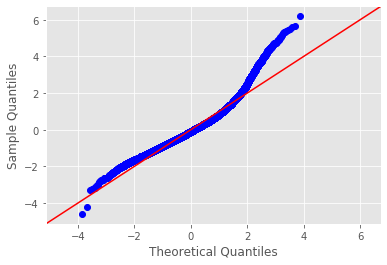

In [312]:
plt.style.use('ggplot')

resid = model5.resid

fig = sm.graphics.qqplot(resid, dist=stats.norm, line='45', fit=True)

In [313]:
#little change to overall model, reverting back to top 15 features

# Model 6: Log transformations

## Log Transformations

In [314]:
cont_vars_refined

['sqft_living', 'sqft_living15', 'sqft_above', 'sqft_basement']

In [315]:
#not including basement as we know it is skewed because all homes without a basement are set to 0

distro_check = ['price','sqft_living', 'sqft_living15', 'sqft_above']

In [316]:
#Checking distribution of each variable

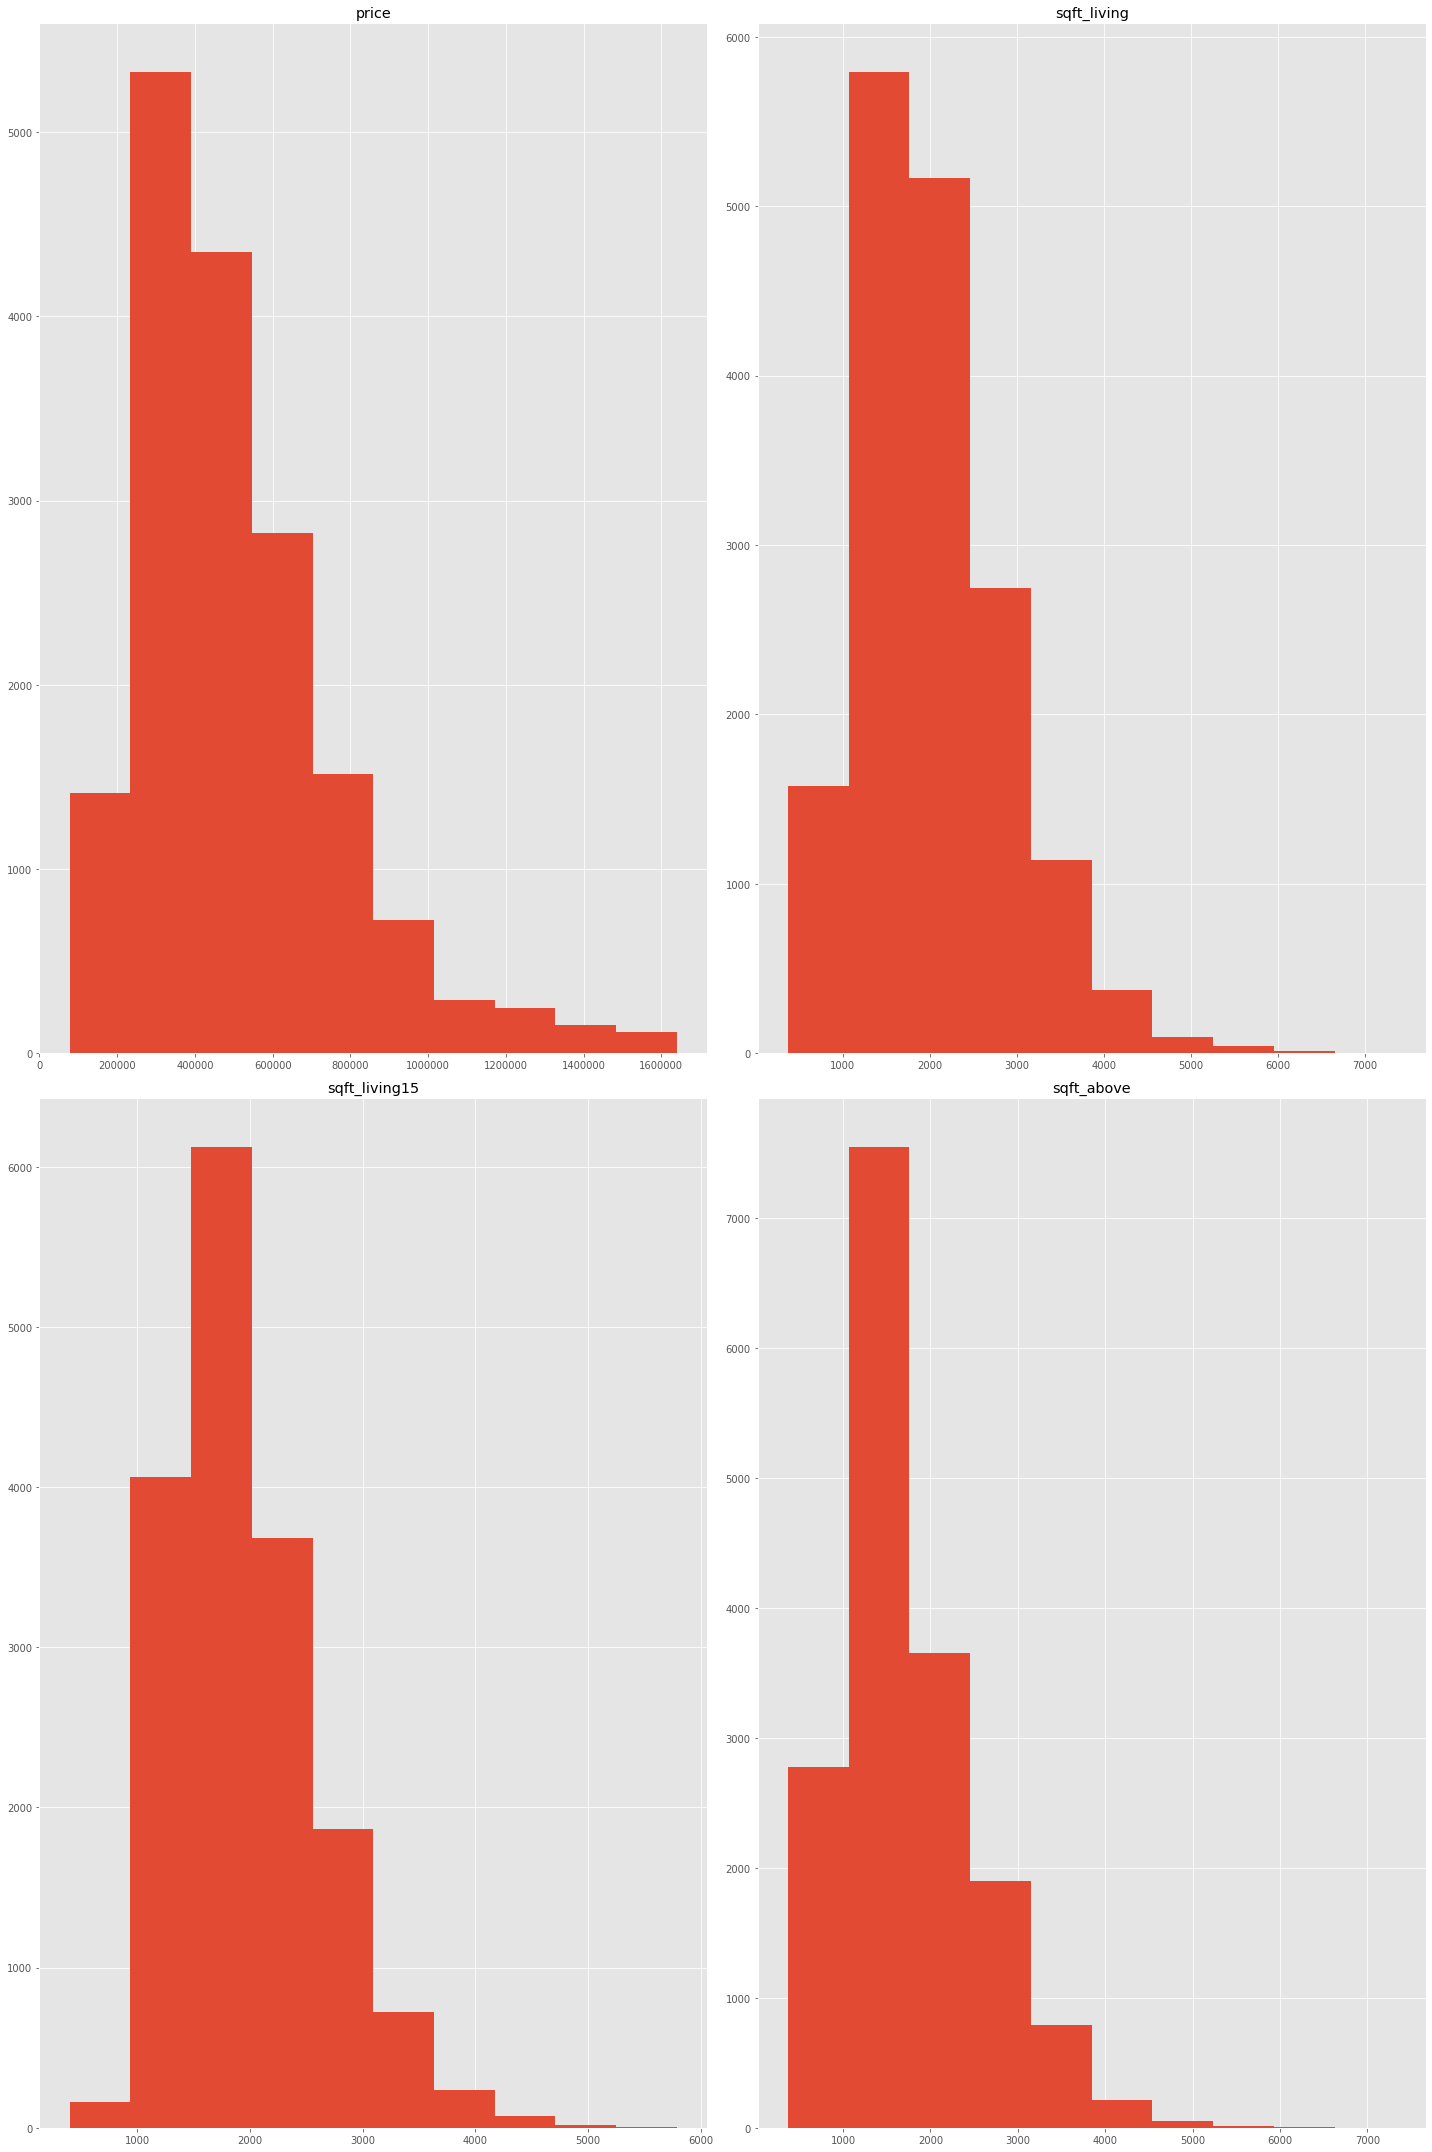

In [317]:
fig, axes = plt.subplots(2,2, figsize=(20,30))
for i,col in enumerate(distro_check):
    axes[i//2,i%2].hist(high_corr_df_top_15[col])
    axes[i//2,i%2].set_title(f'{col}')
plt.tight_layout()
plt.show()

In [318]:
#All skewed left

In [319]:
normalized_df = high_corr_df_top_15.copy()

In [320]:
for feat in distro_check:
    normalized_df[feat] = normalized_df[feat].map(lambda x: np.log(x))

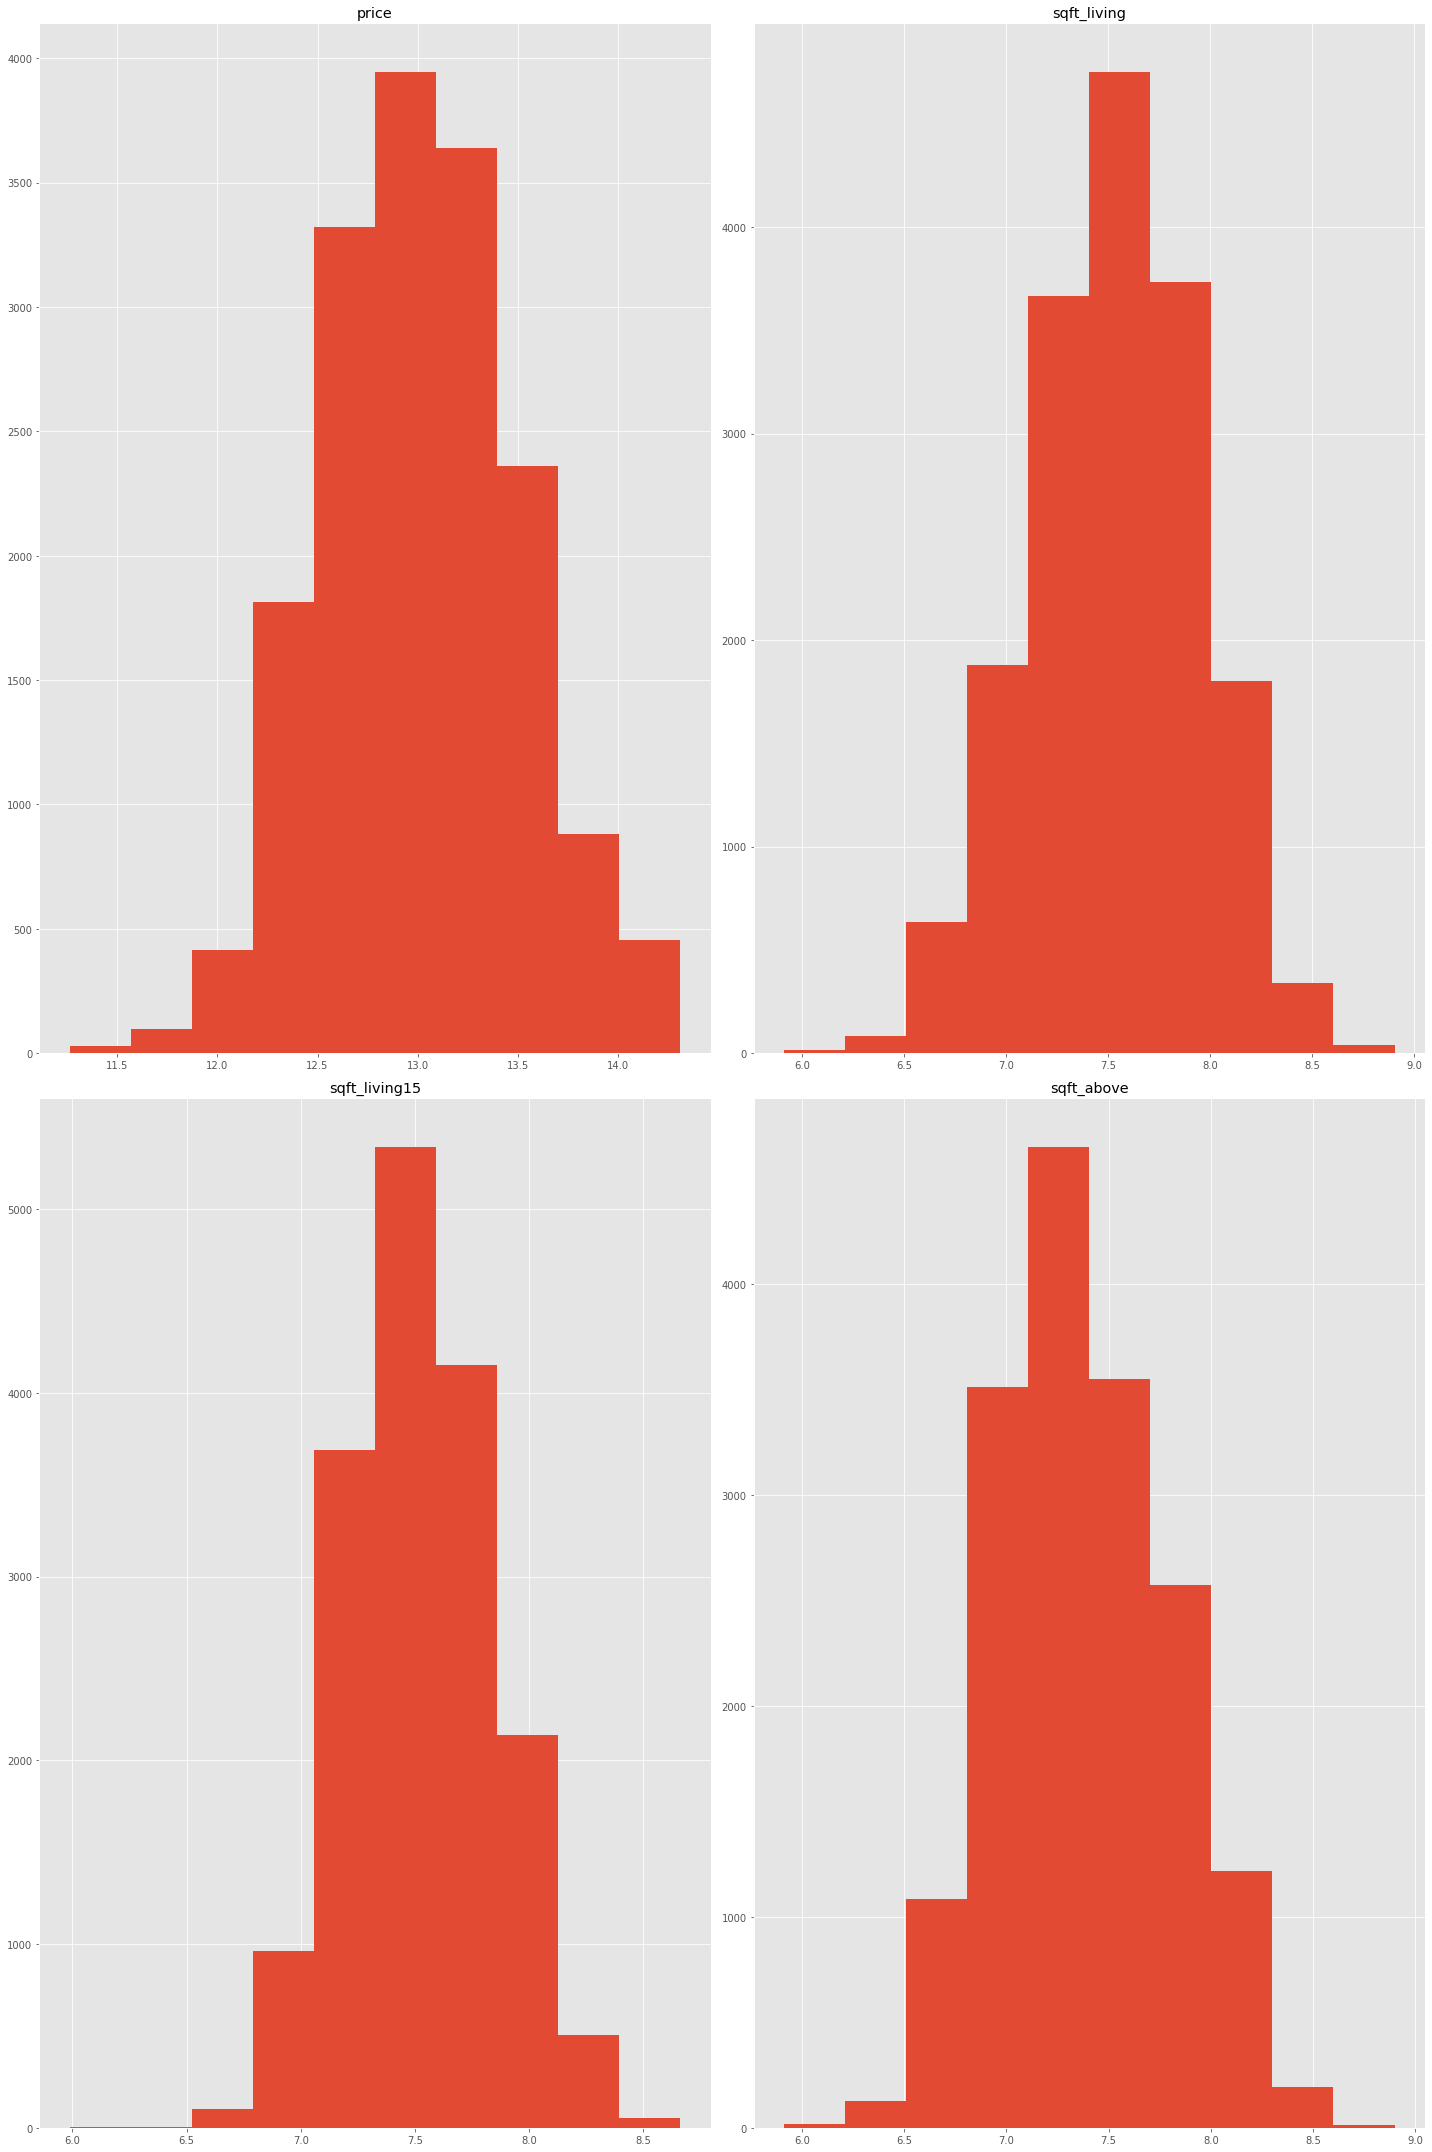

In [321]:
fig, axes = plt.subplots(2,2, figsize=(20,30))
for i,col in enumerate(distro_check):
    axes[i//2,i%2].hist(normalized_df[col])
    axes[i//2,i%2].set_title(f'{col}')
plt.tight_layout()
plt.show()

## Model

In [322]:
outcome = 'price'
x_cols_6 = list(normalized_df.columns)
x_cols_6.remove('price')

predictors6 = '+'.join(x_cols_6)
formula6 = outcome + '~' + predictors6

In [323]:
model6 = ols(formula=formula6, data=normalized_df).fit()
model6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.558
Model:                            OLS   Adj. R-squared:                  0.558
Method:                 Least Squares   F-statistic:                     1425.
Date:                Sat, 24 Oct 2020   Prob (F-statistic):               0.00
Time:                        12:38:10   Log-Likelihood:                -4817.0
No. Observations:               16950   AIC:                             9666.
Df Residuals:                   16934   BIC:                             9790.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept                      8.5843      0.086    100.140      0.000       8.416       8.752
sqft_living                    0.4312      0.037     11.692      0.000       0.359       0.503
sqft_living15                  0.1998      0.012     16.459      0.000       0.176       0.224
sqft_above                    -0.0346      0.034     -1.026      0.305      -0.101       0.031
grade_7                       -0.1497      0.006    -23.392      0.000      -0.162      -0.137
grade_9                        0.1227      0.009     14.160      0.000       0.106       0.140
grade_11                       0.3021      0.023     13.159      0.000       0.257       0.347
sqft_basement               3.134e-05   1.87e-05      1.678      0.093   -5.28e-06     6.8e-05
grade_6                       -0.2806      0.011    -26.499      0.000      -0.301      -0.260
floors_2_0                    -0.0317      0.007     -4.717      0.000      -0.045      -0.019
neighborhood_Bellevue          0.2625      0.011     24.586      0.000       0.242       0.283
bathrooms_3_5                  0.1178      0.015      7.978      0.000       0.089       0.147
neighborhood_Kent             -0.4015      0.011    -37.350      0.000      -0.423      -0.380
neighborhood_Mercer_Island     0.4221      0.024     17.439      0.000       0.375       0.470
bathrooms_3_25                 0.1433      0.017      8.628      0.000       0.111       0.176
view_4_0                       0.3491      0.025     14.033      0.000       0.300       0.398
==============================================================================
Omnibus:                       20.874   Durbin-Watson:                   2.019
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               20.998
Skew:                          -0.080   Prob(JB):                     2.76e-05
Kurtosis:                       3.065   Cond. No.                     1.79e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.79e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [331]:
X_train6 = normalized_df.drop('price',axis=1)
y_train6 = normalized_df.price

X_test6 = X_test[x_cols_6]
y_test6 = y_test.copy()

linreg6 = LinearRegression() 
linreg6.fit(X_train6, y_train6)
y_hat_train6 = linreg6.predict(X_train6)
y_hat_test6 = linreg6.predict(X_test6)

train_mse6 = mean_squared_error(y_train6, y_hat_train6) 
test_mse6 = mean_squared_error(y_test6, y_hat_test6) 
print('Train Mean Squarred Error:', train_mse6) 
print('Test Mean Squarred Error:', test_mse6)

test_mse6-train_mse6

Train Mean Squarred Error: 0.1033635484242605
Test Mean Squarred Error: 333986220481.55994


333986220481.45654

In [ ]:
#RMSE is significantly worse here

# First Approach Summary

In [ ]:
#Given the low R2 value and the high RMSE of these models, I'd like to attempt training the model with fewer categorical variables
#See the part 3 notebook to see the results of this approach